# Drawing graphs in Graphviz


All of the basic graph types provided by the Catlab `Graphs` module can be
drawn using [Graphviz](https://www.graphviz.org/). By default, "directed"
graph types (`Graph`, `ReflexiveGraph`) are drawn using the `dot` program and
"undirected" graph types (`SymmetricGraph`, `HalfEdgeGraph`) are drawn using
the `neato` program.

In [1]:
using Catlab.Graphs, Catlab.Graphics

## Drawing basic graphs

In [2]:
g = cycle_graph(Graph, 3)
to_graphviz(g)

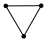

In [3]:
sg = cycle_graph(SymmetricGraph, 3)
to_graphviz(sg)

Node and edge IDs can be shown by setting `node_labels=true` and
`edge_labels=true`, or a data attribute can be used as a label by setting
`node_labels=:my_vertex_attr` and `edge_lables=:my_edge_attr`.

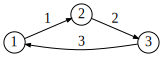

In [4]:
to_graphviz(g, node_labels=true, edge_labels=true)

Graph-level, node-level, and edge-level [Graphviz
attributes](https://graphviz.org/doc/info/attrs.html) can be supplied using
the `graph_attrs`, `node_attrs`, and `edge_attrs` keyword arguments.

In [5]:
to_graphviz(g, node_attrs=Dict(:color => "cornflowerblue"),
            edge_attrs=Dict(:style => "dotted"))

## Drawing graph homomorphisms

Graph homomorphsims (`ACSetTransformation`s between graphs) can also be drawn
using Graphviz, in several different styles.

In [6]:
using Catlab.CategoricalAlgebra

f = homomorphism(cycle_graph(Graph, 4), complete_graph(Graph, 2))

ACSetTransformation((V = FinFunction([1, 2, 1, 2], 4, 2), E = FinFunction([1, 2, 1, 2], 4, 2)), Graph {V = 4, E = 4}, Graph {V = 2, E = 2})

By default, the domain and codomain graph are both drawn, as well the vertex
mapping between them.

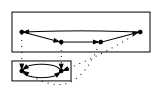

In [7]:
to_graphviz(f)

To see the edge mapping, which is not necessarily unique in the presence of
the multiple edges, colors can be used.

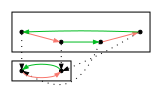

In [8]:
to_graphviz(f, edge_colors=true)

Alternatively, the graph homomorphism can be depicted by drawing only the
domain graph and coloring its nodes and edges. By default, setting
`draw_codom=false` sets both `node_colors=true` and `edge_colors=true`.

In [9]:
to_graphviz(f, draw_codom=false)

In [10]:
to_graphviz(f, draw_codom=false, edge_colors=false)